<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basics-of-Mobile-Robotics---Final-Project" data-toc-modified-id="Basics-of-Mobile-Robotics---Final-Project-1">Basics of Mobile Robotics - Final Project</a></span></li><li><span><a href="#1-Introduction" data-toc-modified-id="1-Introduction-2">1 Introduction</a></span></li><li><span><a href="#2-Project-setup" data-toc-modified-id="2-Project-setup-3">2 Project setup</a></span><ul class="toc-item"><li><span><a href="#2.1-Module-installation" data-toc-modified-id="2.1-Module-installation-3.1">2.1 Module installation</a></span></li><li><span><a href="#2.2-Folder-path-definitions-and-imports" data-toc-modified-id="2.2-Folder-path-definitions-and-imports-3.2">2.2 Folder path definitions and imports</a></span></li></ul></li><li><span><a href="#3-Image-processing-and-vision" data-toc-modified-id="3-Image-processing-and-vision-4">3 Image processing and vision</a></span><ul class="toc-item"><li><span><a href="#3.1-Image-acquisition" data-toc-modified-id="3.1-Image-acquisition-4.1">3.1 Image acquisition</a></span></li><li><span><a href="#3.2-ArUco-markers" data-toc-modified-id="3.2-ArUco-markers-4.2">3.2 ArUco markers</a></span></li><li><span><a href="#3.3-ArUco-markers-detection" data-toc-modified-id="3.3-ArUco-markers-detection-4.3">3.3 ArUco markers detection</a></span></li><li><span><a href="#3.4-Map-creation" data-toc-modified-id="3.4-Map-creation-4.4">3.4 Map creation</a></span><ul class="toc-item"><li><span><a href="#3.4.1-Detect-and-label-map-corners" data-toc-modified-id="3.4.1-Detect-and-label-map-corners-4.4.1">3.4.1 Detect and label map corners</a></span></li><li><span><a href="#3.4.2-Calculate-transformation-matrix-from-corners-and-get-rectified-image" data-toc-modified-id="3.4.2-Calculate-transformation-matrix-from-corners-and-get-rectified-image-4.4.2">3.4.2 Calculate transformation matrix from corners and get rectified image</a></span></li><li><span><a href="#3.4.3-Apply-filters-to-rectified-image" data-toc-modified-id="3.4.3-Apply-filters-to-rectified-image-4.4.3">3.4.3 Apply filters to rectified image</a></span></li><li><span><a href="#3.4.4-Convert-filtered-rectified-image-to-grid-map-and-enlarge-the-obstacles" data-toc-modified-id="3.4.4-Convert-filtered-rectified-image-to-grid-map-and-enlarge-the-obstacles-4.4.4">3.4.4 Convert filtered rectified image to grid map and enlarge the obstacles</a></span></li></ul></li><li><span><a href="#3.5-Thymio-and-objective-pose-measurement" data-toc-modified-id="3.5-Thymio-and-objective-pose-measurement-4.5">3.5 Thymio and objective pose measurement</a></span></li></ul></li><li><span><a href="#4-Global-path-creation" data-toc-modified-id="4-Global-path-creation-5">4 Global path creation</a></span></li><li><span><a href="#5-Connection-to-the-Thymio" data-toc-modified-id="5-Connection-to-the-Thymio-6">5 Connection to the Thymio</a></span><ul class="toc-item"><li><span><a href="#5.1-Automatic-port-detection" data-toc-modified-id="5.1-Automatic-port-detection-6.1">5.1 Automatic port detection</a></span></li><li><span><a href="#5.2-Reading-some-values-from-the-Thymio" data-toc-modified-id="5.2-Reading-some-values-from-the-Thymio-6.2">5.2 Reading some values from the Thymio</a></span></li></ul></li><li><span><a href="#6-Moving-the-Thymio" data-toc-modified-id="6-Moving-the-Thymio-7">6 Moving the Thymio</a></span><ul class="toc-item"><li><span><a href="#6.1-Speed-coefficient-measurement" data-toc-modified-id="6.1-Speed-coefficient-measurement-7.1">6.1 Speed coefficient measurement</a></span></li><li><span><a href="#6.2-Rotation-coefficient-measurement" data-toc-modified-id="6.2-Rotation-coefficient-measurement-7.2">6.2 Rotation coefficient measurement</a></span></li></ul></li><li><span><a href="#7-Pose-estimation:-Kalman-filter" data-toc-modified-id="7-Pose-estimation:-Kalman-filter-8">7 Pose estimation: Kalman filter</a></span><ul class="toc-item"><li><span><a href="#7.1-Kalman-filter-model" data-toc-modified-id="7.1-Kalman-filter-model-8.1">7.1 Kalman filter model</a></span></li><li><span><a href="#7.2-Measurement-noise-covariance-matrix" data-toc-modified-id="7.2-Measurement-noise-covariance-matrix-8.2">7.2 Measurement noise covariance matrix</a></span><ul class="toc-item"><li><span><a href="#7.2.1-Position-measurement-covariance" data-toc-modified-id="7.2.1-Position-measurement-covariance-8.2.1">7.2.1 Position measurement covariance</a></span></li><li><span><a href="#7.2.2-Velocity-covariance-measurement" data-toc-modified-id="7.2.2-Velocity-covariance-measurement-8.2.2">7.2.2 Velocity covariance measurement</a></span></li></ul></li><li><span><a href="#7.3-Process-noise-covariance-matrix" data-toc-modified-id="7.3-Process-noise-covariance-matrix-8.3">7.3 Process noise covariance matrix</a></span></li></ul></li><li><span><a href="#8-Local-avoidance" data-toc-modified-id="8-Local-avoidance-9">8 Local avoidance</a></span><ul class="toc-item"><li><span><a href="#8.1-Local-avoidance-demonstration" data-toc-modified-id="8.1-Local-avoidance-demonstration-9.1">8.1 Local avoidance demonstration</a></span></li></ul></li><li><span><a href="#9-Navigation" data-toc-modified-id="9-Navigation-10">9 Navigation</a></span><ul class="toc-item"><li><span><a href="#9.1-Full-demo" data-toc-modified-id="9.1-Full-demo-10.1">9.1 Full demo</a></span></li><li><span><a href="#9.2-More-demonstrations" data-toc-modified-id="9.2-More-demonstrations-10.2">9.2 More demonstrations</a></span><ul class="toc-item"><li><span><a href="#9.2.1-Global-path-following-and-kidnapping-situations" data-toc-modified-id="9.2.1-Global-path-following-and-kidnapping-situations-10.2.1">9.2.1 Global path following and kidnapping situations</a></span></li><li><span><a href="#9.2.2-Transition-between-local-and-global-navigation" data-toc-modified-id="9.2.2-Transition-between-local-and-global-navigation-10.2.2">9.2.2 Transition between local and global navigation</a></span></li><li><span><a href="#9.2.3-Obstructed-camera" data-toc-modified-id="9.2.3-Obstructed-camera-10.2.3">9.2.3 Obstructed camera</a></span></li></ul></li></ul></li><li><span><a href="#10-Conclusion" data-toc-modified-id="10-Conclusion-11">10 Conclusion</a></span></li></ul></div>

 # Basics of Mobile Robotics - Final Project


**Authors:** 

*NGUYEN Vincent (301403)*

*BAKKALI Yassine (301265)*

*FURST Nelson (287388)*

*RIGHI Matteo (287327)*

# 1 Introduction
This project consists in the implementation of global and local navigation for a Thymio robot. The Thymio should be able to find the optimal path towards an objective, and should avoid map obstacles and additional obstacles that are in its way. The features of our implementation are the following:
- Robust map creation and feature localisation using ArUco markers
- Global path computation with A* algorithm on grid map
- Path simplification
- Automatic port detection and connection to the Thymio
- Path following and dynamic regulation
- Thymio and objective kidnapping detection
- Map recomputation in case of kidnapping situations
- Kalman filter for navigation in the absence of measurements from the camera
- Local obstacle avoidance using potential field


# 2 Project setup

## 2.1 Module installation
Our project uses modules from the extended OpenCV library for python. For this reason, it is necessary to first uninstall the base library and then install the extended one in order to avoid any conflicts.

In [1]:
!pip uninstall opencv-python

In [2]:
# For ArUco markers
!pip install --user opencv-contrib-python
# For path simplification
!pip install rdp 

Defaulting to user installation because normal site-packages is not writeable


In [8]:
## Optional, add package path to sys if import raises errors
import sys
sys.path.append('c:\python310\lib\site-packages')

## 2.2 Folder path definitions and imports

In [4]:
import os
import sys
import time
import cv2
import matplotlib.pyplot as plt

#  Set default figure size
plt.rcParams['figure.figsize'] = [8.25, 6]

# Add folders to path
sys.path.insert(1, 'src')
sys.path.insert(1, 'img')
sys.path.insert(1, 'video')

# 3 Image processing and vision

## 3.1 Image acquisition
For this project we are using a high-performance webcam (Logitech Brio), which ensures that there are no errors when starting the camera feed and a good image quality. The following section is used to save pictures to the **img/cam** folder; these pictures are used in subsequent sections as test images.

In [5]:
from camera import *
TAKE_PICTURE = False

In [12]:
if TAKE_PICTURE:
    # Get video capture instance. Default image size is 800 x 600.
    cam = init_camera()

    ## First take a picture in normal lighting conditions
    img_taken = False
    while not img_taken:
        img_normal, img_taken = take_picture(cam)
    save_camera_img(img_normal, "img_normal")
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    cam.release()

In [13]:
if TAKE_PICTURE:
    cam = init_camera()
    ## Then take it in low lighting conditions
    img_taken = False
    while not img_taken:
        img_low, img_taken = take_picture(cam)
    save_camera_img(img_low, "img_low")
    plt.imshow(cv2.cvtColor(img_low, cv2.COLOR_BGR2RGB))
    cam.release()

## 3.2 ArUco markers
We use Aruco markers to detect map corners, the position of the Thymio the and of the objective. ArUco markers come in different sizes (4x4 up to 7x7 using aruco module from cv2). For this project, we will use the **DICT_4X4_50** dictionary, which is a set of 50 different markers, of size 4x4 (or 6x6 if edges are accounted for). We use 6 different ArUco markers: 4 to detect the corners of the map, 1 to locate the Thymio and 1 to detect the position of the global objective.

The first step is to assign a unique ArUco marker ID (corresponding to a certain entry in the **DICT_4X4_50** dictionary) to each of the features that we want to detect. We arbitrarily choose the following IDs for each feature:
- Map IDs = [1, 2, 3, 4]
- Thymio ID = 5
- Objective ID = 6

The markers can then be generated using our custom function **generate_aruco_markers**.

In [5]:
from cv2 import aruco
from generate_aruco_markers import *

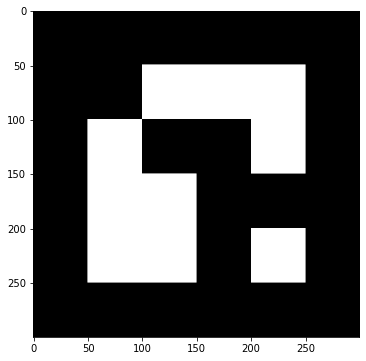

In [15]:
MAP_CORNER_ID = [1, 2, 3, 4]
THYMIO_ID = 5
OBJECTIVE_ID = 6

# Example of an ArUco marker generated using Thymio's marker ID.
marker = generate_aruco_marker(THYMIO_ID)
plt.imshow(marker, cmap = 'Greys_r')

## 3.3 ArUco markers detection
Once printed, ArUco markers can then be detected. The following code, taken from https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/, serves as an example of tag detection.

In [16]:
# This function displays detected aruco markers in an image. Labels (IDs) are also shown on top of the marker.
def display_aruco_markers(img):
    aruco_dict = arucoDict = cv2.aruco.Dictionary_get(DEF_ARUCO_DICT)
    aruco_params = cv2.aruco.DetectorParameters_create()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # cv2.imshow('raw image', img)
    # cv2.waitKey(1)
    (corners, ids, rejected) = cv2.aruco.detectMarkers(img, aruco_dict, parameters=aruco_params)
    # verify *at least* one ArUco marker was detected
    if len(corners) > 3:
        # flatten the ArUco IDs list
        ids = ids.flatten()
        # loop over the detected ArUCo corners
        for (markerCorner, markerID) in zip(corners, ids):
            # extract the marker corners (which are always returned in
            # top-left, top-right, bottom-right, and bottom-left order)
            corners = markerCorner.reshape((4, 2))
            (topLeft, topRight, bottomRight, bottomLeft) = corners
            # convert each of the (x, y)-coordinate pairs to integers
            topRight = (int(topRight[0]), int(topRight[1]))
            bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
            bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
            topLeft = (int(topLeft[0]), int(topLeft[1]))
            # draw the bounding box of the ArUCo detection
            cv2.line(img, topLeft, topRight, (0, 255, 0), 2)
            cv2.line(img, topRight, bottomRight, (0, 255, 0), 2)
            cv2.line(img, bottomRight, bottomLeft, (0, 255, 0), 2)
            cv2.line(img, bottomLeft, topLeft, (0, 255, 0), 2)
            # compute and draw the center (x, y)-coordinates of the ArUco
            # marker
            cX = int((topLeft[0] + bottomRight[0]) / 2.0)
            cY = int((topLeft[1] + bottomRight[1]) / 2.0)
            cv2.circle(img, (cX, cY), 4, (0, 0, 255), -1)
            # draw the ArUco marker ID on the image
            cv2.putText(img, str(markerID),
                (topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 255, 0), 2)
            print("[INFO] ArUco marker ID: {}".format(markerID))
            # show the output image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        print("ArUco markers not found")

[INFO] ArUco marker ID: 3
[INFO] ArUco marker ID: 4
[INFO] ArUco marker ID: 6
[INFO] ArUco marker ID: 5
[INFO] ArUco marker ID: 2
[INFO] ArUco marker ID: 1


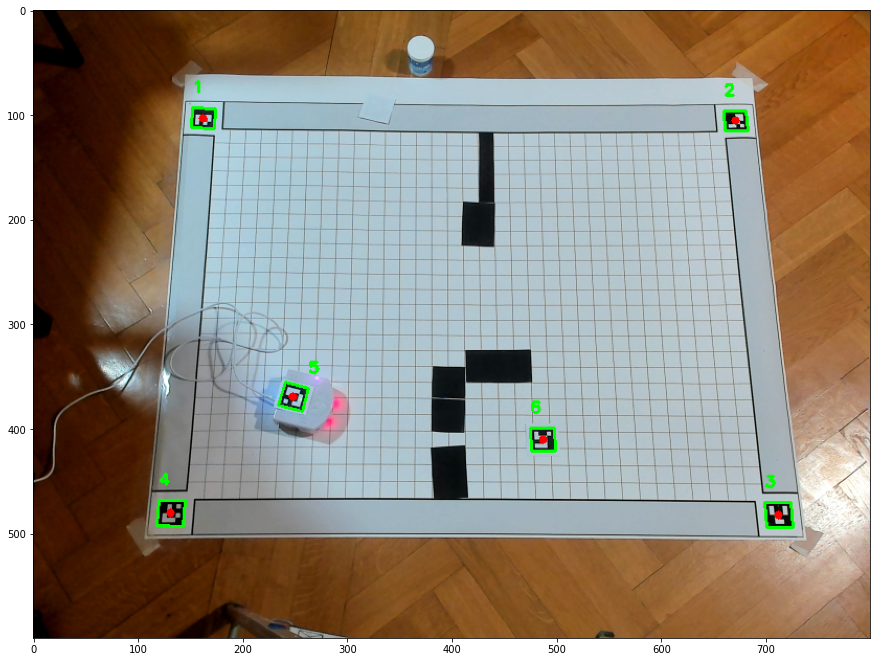

In [17]:
# In normal lighting conditions
img = cv2.imread(dirname + "img_normal.png")
fig=plt.figure(figsize=(15, 15))
display_aruco_markers(img)

[INFO] ArUco marker ID: 4
[INFO] ArUco marker ID: 3
[INFO] ArUco marker ID: 6
[INFO] ArUco marker ID: 5
[INFO] ArUco marker ID: 2
[INFO] ArUco marker ID: 1


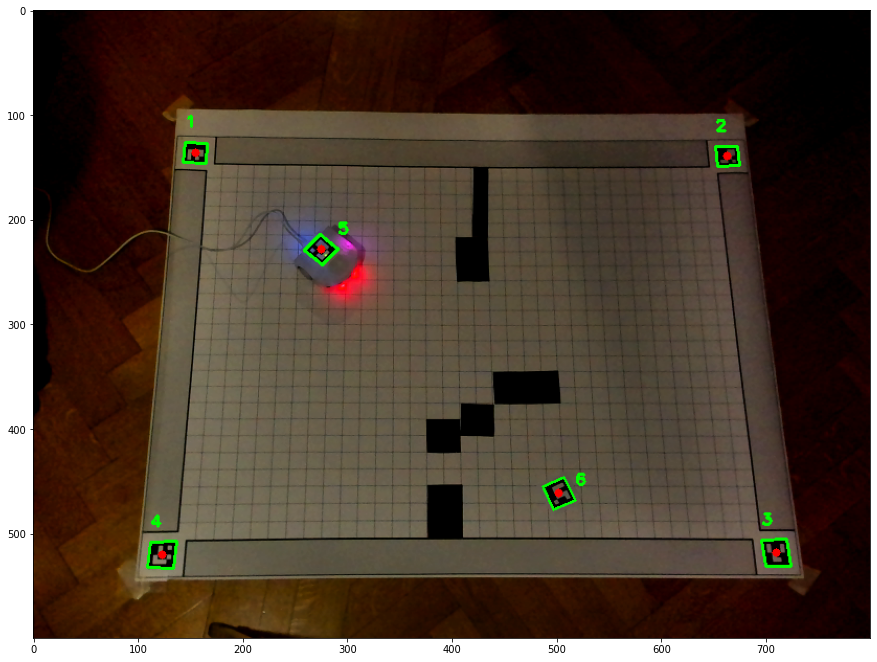

In [18]:
# In low lighting conditions
img = cv2.imread(dirname + "img_low.png")
fig=plt.figure(figsize=(15, 15))
display_aruco_markers(img)

We can see that the marker detection is indeed extremely robust. 

We have found in other tests, which we will not shown here, that it is possible to detect markers up to an inclination of 70 degrees. This means that the camera does not need to be placed directly above the map. 

## 3.4 Map creation
The map creation process is defined as follow:
1. Detect and label map corners (top left, top right, bottom left, bottom right) from ArUco tags localisation
2. Calculate transformation matrix from corners and get rectified image
3. Apply various filters to rectified image (binarisation, gaussian blur, noise suppression, ArUco tags obstruction)
4. Convert rectified image to grid, detect obstacles
5. Dilate map to get enlarged obstacles (to avoid collision with the Thymio)

The functions called in the following subsections will refer to the **create_map.py** module.


In [6]:
from create_map import *

### 3.4.1 Detect and label map corners

Map corners found.


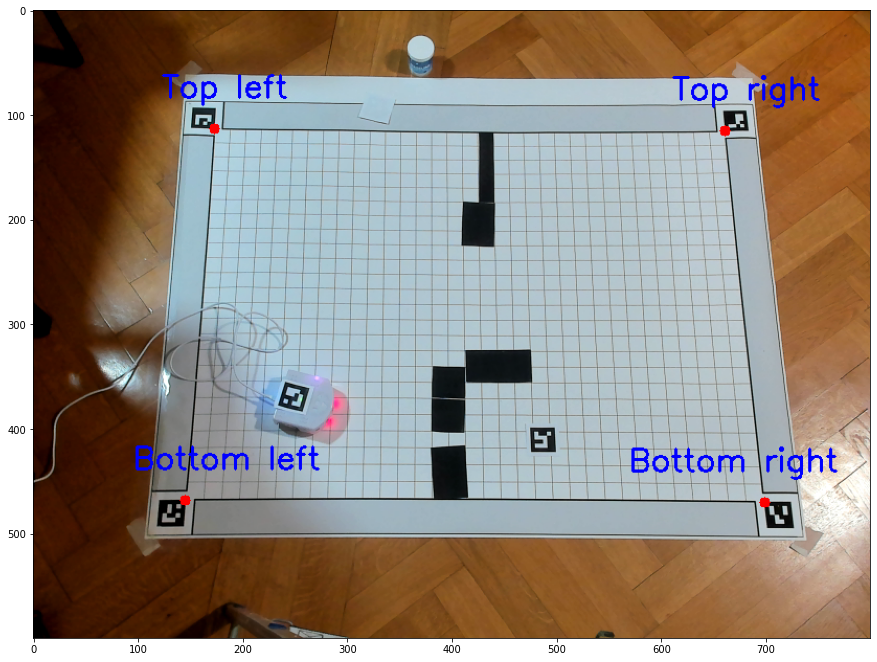

In [7]:
img = cv2.imread(dirname + "img_normal.png")
top_left, top_right, bot_left, bot_right, found_corners = get_map_corners(img)
if found_corners:
    print("Map corners found.")
    cv2.circle(img, [int(top_left[0]),int(top_left[1])] , 5, (0, 0, 255), -1)
    cv2.putText(img, "Top left", (top_left[0] - 50, top_left[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.circle(img, [int(top_right[0]),int(top_right[1])] , 5, (0, 0, 255), -1)
    cv2.putText(img, "Top right", (top_right[0] - 50, top_right[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.circle(img, [int(bot_left[0]),int(bot_left[1])] , 5, (0, 0, 255), -1)
    cv2.putText(img, "Bottom left", (bot_left[0] - 50, bot_left[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.circle(img, [int(bot_right[0]),int(bot_right[1])] , 5, (0, 0, 255), -1)
    cv2.putText(img, "Bottom right", (bot_right[0] -  130, bot_right[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
else:
    print("Map corners were not found.")
fig=plt.figure(figsize=(15, 15))    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 3.4.2 Calculate transformation matrix from corners and get rectified image
The warp transform matrix is calculated knowing the map dimensions in cells (to have the correct ratio between width and height).

Image dimensions are 800 x 600
Rectified image dimensions are 800 x 581


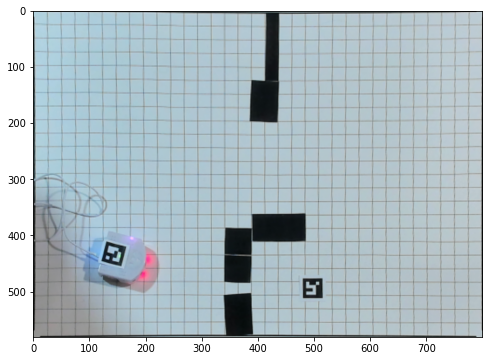

In [8]:
img = cv2.imread(dirname + "img_normal.png")
map_width = MAP_WIDTH_CELL # 33
map_height = MAP_HEIGHT_CELL # 24
M, rect_width, rect_height, matrix_computed = get_warp_matrix(img, map_width, map_height, verbose = True)

# Rectified image dimensions have the same ratio as given parameters (33/24) 
# and resolution is bounded by original image dimensions.
img_rect = get_rectified_img(img, M, rect_width, rect_height)
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))

### 3.4.3 Apply filters to rectified image

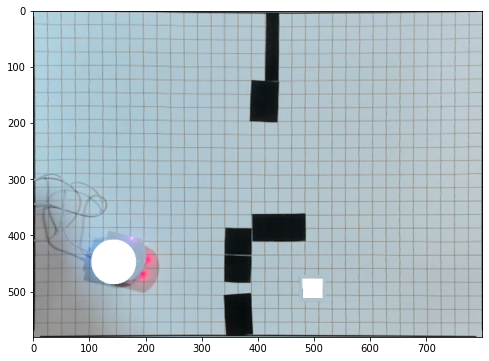

In [9]:
# Remove aruco tags from image. This is done to avoid having them considered as obstacles.
# In the case of the Thymio, we add a large white circle to also cover the wheels, which 
# could also be considered as obstacles otherwise.
img_rect = remove_aruco_tags(img_rect)
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))

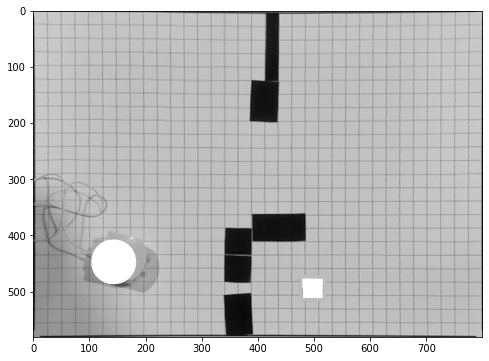

In [10]:
 # Convert to grayscale
img_rect_gray = cv2.cvtColor(img_rect, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_rect_gray, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Filtered and thresholded rectified image')

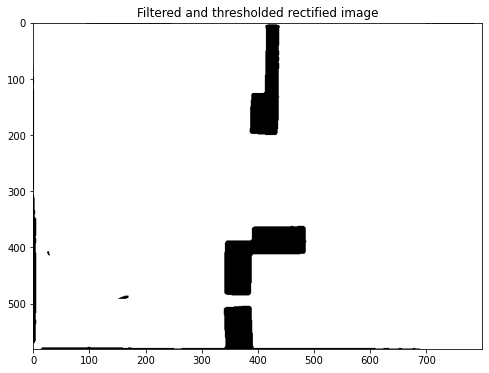

In [11]:
# Convert to binary image
# Blur to reduce noise
img_rect_gray = cv2.GaussianBlur(img_rect_gray,(9,9),cv2.BORDER_DEFAULT)
# Otsu's method is used for dynamic thresholding
(thresh, img_rect_bin) = cv2.threshold(img_rect_gray, BIN_THR_LOW, BIN_THR_HIGH, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_rect_bin = cv2.morphologyEx(img_rect_bin, cv2.MORPH_OPEN, (4,4))
plt.imshow(img_rect_bin, cmap = 'Greys_r')
plt.title("Filtered and thresholded rectified image")

### 3.4.4 Convert filtered rectified image to grid map and enlarge the obstacles
Details about the implementation will not be discussed here. Please refer to the **create_map** function in the file **create_map.py**.

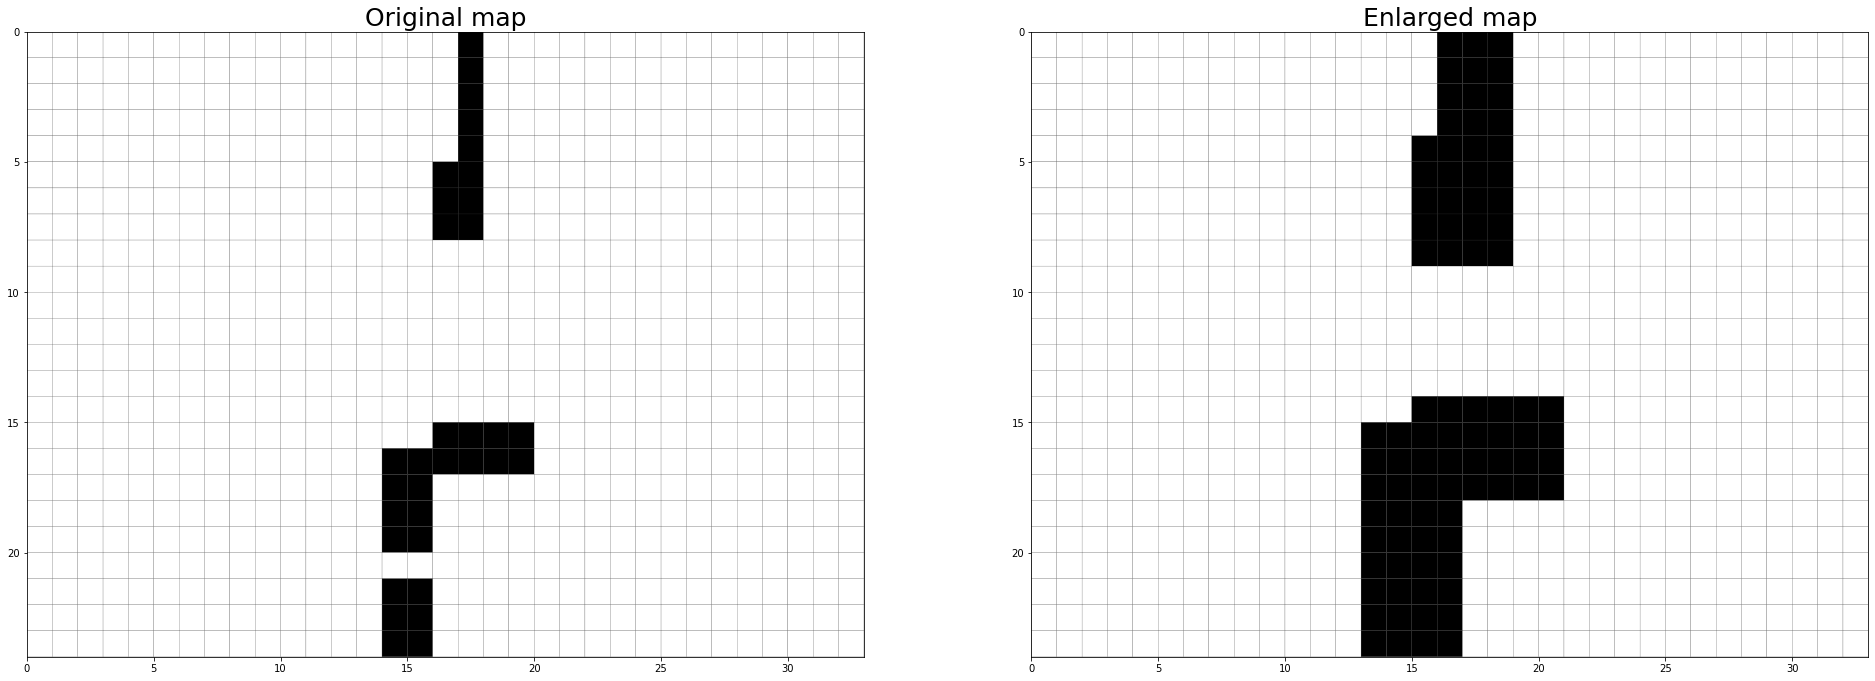

<Figure size 594x432 with 0 Axes>

In [12]:
M, rect_width, rect_height, map, map_enlarged, map_created = create_map(img, MAP_WIDTH_CELL, MAP_HEIGHT_CELL)

f, axs = plt.subplots(1,2)
f.set_figheight(11.5)
f.set_figwidth(33)
plt.figure()

axs[0].pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
axs[0].set_title("Original map", fontsize=25)
axs[0].invert_yaxis()

axs[1].pcolor(map_enlarged, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
axs[1].set_title("Enlarged map", fontsize=25)
axs[1].invert_yaxis()


## 3.5 Thymio and objective pose measurement
Thymio and objective localization with the camera is fairly straightforward: similarly to what was done with the map, we detect the corresponding ArUco marker. In the case of the Thymio, we must also calculate its orientation.

In [13]:
from locate_thymio_goal import *

Text(0.5, 1.0, 'Rectified image')

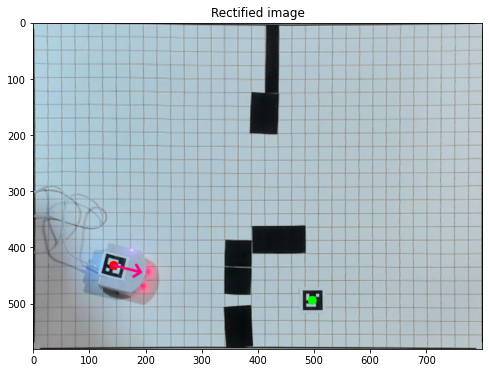

In [14]:
img = cv2.imread(dirname + "img_normal.png")
map_width = MAP_WIDTH_CELL # 33
map_height = MAP_HEIGHT_CELL # 24
M, rect_width, rect_height, map, map_enlarged, map_created = create_map(img, MAP_WIDTH_CELL, MAP_HEIGHT_CELL)
img_rect = get_rectified_img(img, M, rect_width, rect_height)

thymio_pose, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
if thymio_found:
    cv2.circle(img_rect, [int(thymio_pose[0]),int(thymio_pose[1])] , 8, (0, 0, 255), -1)
    cv2.arrowedLine(img_rect, (int(thymio_pose[0]), int(thymio_pose[1])), (int(thymio_pose[0] + 
                    math.cos(thymio_pose[2])*50), int(thymio_pose[1] - math.sin(thymio_pose[2])*50)),
                    (128, 0, 255), 3, tipLength = 0.3)
else:
    print("Thymio not found.")

obj_pose, obj_found = locate_goal_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
if obj_found:
    cv2.circle(img_rect, [int(obj_pose[0]),int(obj_pose[1])] , 8, (0, 255, 0), -1)
else:
    print("Objective not found.")
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
plt.title("Rectified image")

# 4 Global path creation

In [9]:
from global_path_planning import *

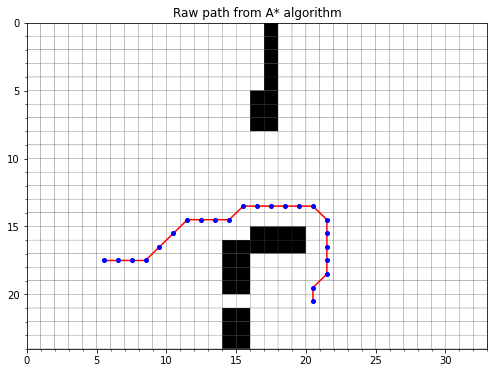

In [16]:
# Read test image
img = cv2.imread(dirname + "img_normal.png")

# Create map
M, rect_width, rect_height, map, map_enlarged, map_created = create_map(img, MAP_WIDTH_CELL, MAP_HEIGHT_CELL)
img_rect = get_rectified_img(img, M, rect_width, rect_height)

# Find Thymio and objective positions
thymio_pos, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
obj_pos, obj_found = locate_goal_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))

# Convert xy coordinates to grid coordinates
thymio_pos_grid = cartesian_to_grid(thymio_pos[0:2], (rect_width, rect_height), (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
obj_pos_grid = cartesian_to_grid(obj_pos, (rect_width, rect_height), (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))

# Compute path (list of cells)
path, found_path = get_global_path(map_enlarged, thymio_pos_grid, obj_pos_grid)

# Plot the path
plt.figure()
plt.plot([row[1]+1/2 for row in path], [col[0]+1/2 for col in path], "-o", color = "r", markersize = 4,
         markerfacecolor = 'b', markeredgecolor = 'b')
plt.title("Raw path from A* algorithm")
plt.pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
plt.gca().invert_yaxis()

plt.minorticks_on()

As there are too many turns, we want to simplify the path. This can be done using the [**Ramer-Douglas-Peucker algorithm**](https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm). We use the [**rdp library**](https://pypi.org/project/rdp/) to implement this function.

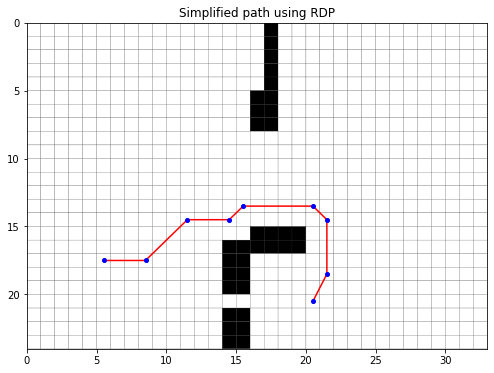

In [17]:
path_rdp = rdp(path, epsilon = 0.5)

# Plot the simplified path
plt.figure()
plt.plot([row[1]+1/2 for row in path_rdp], [col[0]+1/2 for col in path_rdp], "-o", color = "r", markersize = 4,
         markerfacecolor = 'b', markeredgecolor = 'b')
plt.title("Simplified path using RDP")
plt.pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
plt.gca().invert_yaxis()

Now that the path is simplified, we want to add back intermediate points. These are used as local objectives when entering the local avoidance state. Having more points also means that the Thymio will more frequently try to regulate its position to follow the path. The function **lin_refine_implicit** is used to implement this function, which is taken from the following website: https://coderedirect.com/questions/288098/higher-order-local-interpolation-of-implicit-curves-in-python. This function adds 2<sup>(n-1)</sup> points to each segment.

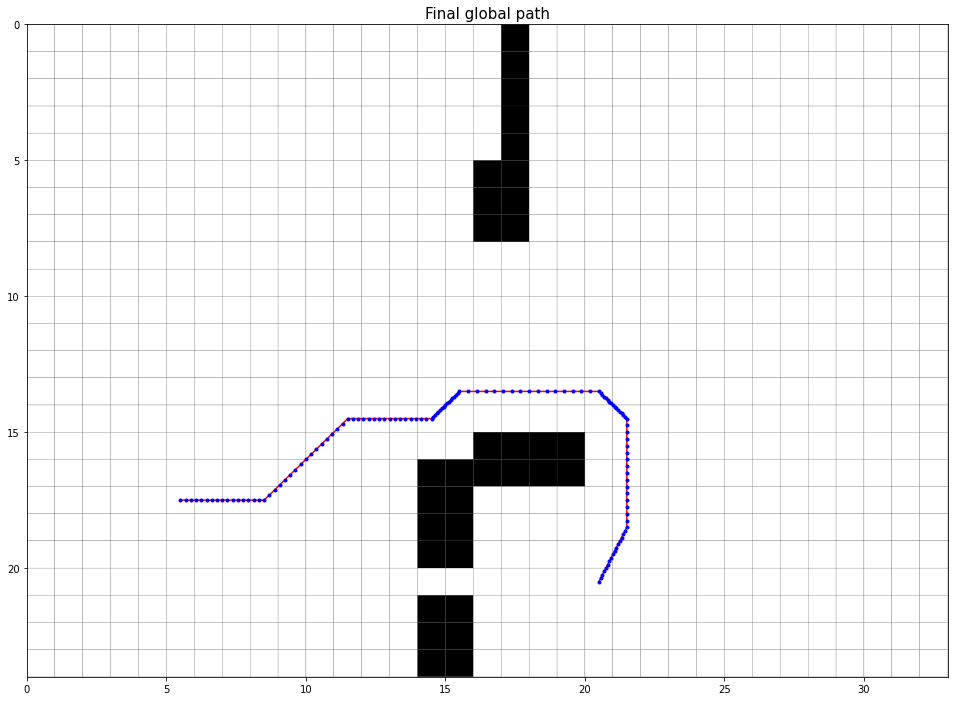

In [18]:
path_refined = lin_refine_implicit(path_rdp, n=5)

# Plot the simplified path with intermediate points (5 intermediate points per segment)
f = plt.figure()
f.set_figheight(12)
f.set_figwidth(16.5)
plt.plot([row[1]+1/2 for row in path_refined], [col[0]+1/2 for col in path_refined], "-o", color = "r", markersize = 3,
         markerfacecolor = 'b', markeredgecolor = 'b')
plt.title("Final global path", fontsize = 15)
plt.pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
plt.gca().invert_yaxis()

# 5 Connection to the Thymio

In [19]:
from MyThymio import *
from thymio_connection import *

## 5.1 Automatic port detection
To ensure that the program can be run on different computers and with different connection types (cable, wireless), we first identify the Thymio VID (Vendor ID) and put it in a list (in case of multiple Thymios, we can have multiple VIDs). When connecting, the program checks for the VID of each serial port, and initiates a communication if a matching VID is found. In practice, with multiple Thymios we have seen only one VID, which was 1559.

In [20]:
check_vid()

Port: COM16, VID: None
Port: COM8, VID: None
Port: COM11, VID: None
Port: COM22, VID: None
Port: COM14, VID: 1559
Port: COM13, VID: None
Port: COM10, VID: None
Port: COM12, VID: None
Port: COM21, VID: None


It is then possible to connect to the Thymio by creating a MyThymio object.

In [48]:
thymio = MyThymio(verbose = True)

Connecting to Thymio. Try 1/inf...
Connecting to Thymio. Try 2/inf...
Connecting to Thymio. Try 3/inf...
Connecting to Thymio. Try 4/inf...
Connecting to Thymio. Try 5/inf...
Successfully connected to thymio on COM14.


## 5.2 Reading some values from the Thymio
Below is an example of reading the proximity sensor values and moving the Thymio. More details about Thymio movements will be discussed in the following section.

In [50]:
# Reading proximity sensor values
prox = thymio.get_prox_horizontal()
print(prox)

# Example: Rotating the THymio, then moving the Thymio forward for 5 second
thymio.set_motor_speeds(-50, 100)
time.sleep(5)
thymio.set_motor_speeds(100, 100)
time.sleep(5)
thymio.stop_thymio()

[4234, 4576, 4762, 3462, 0, 0, 0]


# 6 Moving the Thymio

## 6.1 Speed coefficient measurement
The speed coefficient is used to convert raw speed values to velocities in pixels/second: $v_{px/s} = v_{raw}\cdot SPEED\_COEFF $

Using the test shown below, we found a coefficient value of $SPEED\_COEFF = 0.218$, which is what we used in our program. 

In [32]:
	## Returns speed of the thymio in pixel/s.
    #  @param rect_img1/2    Rectified images used in the speed calculation
    #  @param dt             Elapsed time between the two images were taken
    #  @param speed_type     string variable that can take 'x_y' or 'front_side'
    #                        'x_y' the function will return the speed in x_y coordinates
    #                        'front_side' the function will return the speed in front and side coordinates
	#  @return speed         [total_speed, x_speed,y_speed] or [total_speed, front_speed,side_speed],
    #                        speed of the thymio in pixels/s.
def get_thymio_speed_camera(old_rect_img,new_rect_img,dt,speed_type):
    [thymio_pose1,thymio_found1] = locate_thymio_camera(old_rect_img,'cartesian', (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
    [thymio_pose2,thymio_found2] = locate_thymio_camera(new_rect_img,'cartesian', (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
    
    if (not thymio_found1) or (not thymio_found2):
        print('Thymio was not found in one of the images.')
        return 0
    
    distance = math.sqrt((thymio_pose2[0]-thymio_pose1[0])**2 + (thymio_pose2[1]-thymio_pose1[1])**2)
    print('Distance travelled: {} pixels.'.format(distance))
    total_speed = distance/dt
    #SPEED CALCULATION IN PIXEL/S
    if (speed_type == 'x_y'):
        x_speed = (thymio_pose2[0]-thymio_pose1[0])/dt
        y_speed = (thymio_pose2[1]-thymio_pose1[1])/dt
        
        speed =[total_speed,x_speed,y_speed]
        
    elif (speed_type == 'curvilinear'):
        total_movement = [thymio_pose2[0]-thymio_pose1[0] , thymio_pose2[1]-thymio_pose1[1]]
        #u vecteur unitaire dans la direction du thymio
        u = [math.cos(thymio_pose1[2]), -math.sin(thymio_pose1[2])]
        front_movement = np.multiply(np.dot(total_movement,u),u)
        side_movement = total_movement-front_movement
        
        front_speed = math.sqrt(pow(front_movement[0],2) + pow(front_movement[1],2))/dt
        side_speed = math.sqrt(pow(side_movement[0],2) + pow(side_movement[1],2))/dt
        speed =[total_speed,front_speed,side_speed]
    else:
        print("Speed type not valid.")
        raise TypeError
    return speed

Initial image taken
dt = 10.019238710403442
Initial image taken
Distance travelled: 218.11235636707977 pixels.
Total speed: 	 21.769354206582936
Tangential speed: 	 21.625260913677657
Perpendicular speed: 	 2.5005745313898315
Speed coefficient: 	 0.21769354206582936


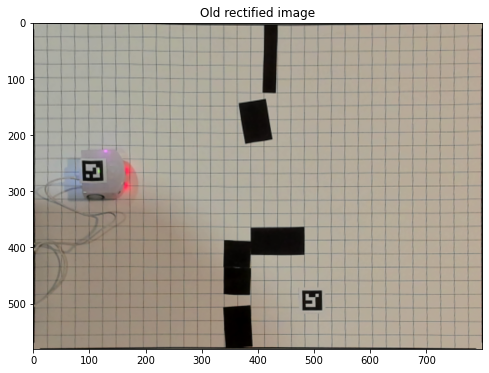

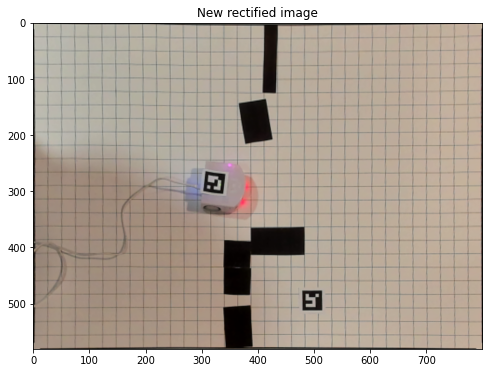

In [57]:
TIME_ELAPSED = 10

# Initialize camera
cam = init_camera()

# Get warp matrix and map dimensions
M, rect_width, rect_height, map, map_enlarged = init_map(cam)

# Take a picture
img, img_taken = take_picture(cam)
speed = []
new_rect_img = []
old_rect_img = []
dt = 0
t1 = 0
t0 = 0
if img_taken:
    print("Initial image taken")
    old_rect_img = get_rectified_img(img, M, rect_width, rect_height)
    t0 = time.time()
    thymio.set_motor_speeds(BASE_SPEED, BASE_SPEED)
    
    plt.figure()
    plt.imshow(cv2.cvtColor(old_rect_img, cv2.COLOR_BGR2RGB))
    plt.title("Old rectified image")
    
time.sleep(TIME_ELAPSED)
thymio.stop_thymio()
t1 = time.time()
dt = t1 - t0    
print("dt = {}".format(dt))

cam.release()
cam = init_camera()
img, img_taken = take_picture(cam)
if img_taken:
    print("Initial image taken")
    new_rect_img = get_rectified_img(img, M, rect_width, rect_height)
    plt.figure()
    plt.imshow(cv2.cvtColor(new_rect_img, cv2.COLOR_BGR2RGB))
    plt.title("New rectified image")
cam.release()

speed = get_thymio_speed_camera(old_rect_img,new_rect_img,dt,"curvilinear")
print("Total speed: \t\t {} px/s".format(speed[0]))
print("Tangential speed: \t {} px/s".format(speed[1]))
print("Perpendicular speed: \t {} px/s".format(speed[2]))

speed_coeff = speed[0]/BASE_SPEED
print("Speed coefficient: \t {}".format(speed_coeff))

## 6.2 Rotation coefficient measurement
In this test, we measure how long it takes for the Thymio to do **NUM_TURNS** revolutions. The rotation coefficient is then given by $\frac{\Delta T_{NUM\_TURNS}}{2\pi NUM\_TURNS}$. We measured a rotation coefficient of 1.50, which is the value that we use in our program.

In [55]:
NUM_TURNS = 5
TURN_THR = np.deg2rad(5)
try:
    # Initialize camera
    cam = init_camera()

    # Get warp matrix and map dimensions
    M, rect_width, rect_height, map, map_enlarged = init_map(cam)
    
    # Measure Thymio's initial orientation
    img, img_taken = take_picture(cam)
    found_thymio = False
    init_angle = 0
    while not found_thymio:
        if img_taken:
            img_rect = get_rectified_img(img, M, rect_width, rect_height)
            thymio_pose, found_thymio = locate_thymio_camera(img_rect,'cartesian', (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
            if found_thymio:
                init_angle = thymio_pose[2]
    
    # Start rotating the Thymio
    start_time = time.time()
    turn_time = time.time()
    thymio.set_motor_speeds(-BASE_SPEED, BASE_SPEED)
    n = 0
    while n < NUM_TURNS:
        # Take a picture
        img, img_taken = take_picture(cam)
        if img_taken:
            img_rect = get_rectified_img(img, M, rect_width, rect_height)
            thymio_pose, found_thymio = locate_thymio_camera(img_rect,'cartesian', (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
            if found_thymio:
                if (abs(thymio_pose[2] - init_angle) < TURN_THR) and (time.time() - turn_time > 2):
                    print("Revolution {}/{}".format(n+1, NUM_TURNS))
                    n = n + 1
                    turn_time = time.time()
    thymio.stop_thymio()
    rot_coeff = (turn_time-start_time)/(NUM_TURNS*2*math.pi)
    print("Rotation coefficient: {}".format(rot_coeff))
finally:
    cam.release()

Revolution 1/5
Revolution 2/5
Revolution 3/5
Revolution 4/5
Revolution 5/5
Rotation coefficient: 1.5067944255418666


# 7 Pose estimation: Kalman filter

In [70]:
from kalman_filter import T_s

## 7.1 Kalman filter model
To localize the Thymio robot, we use a Kalman filter. 

The states of the filter are the x and y position and speed of the robot:
$$ 
x^t = \begin{bmatrix} x \\ y \\ v_x \\ v_y \end{bmatrix}
$$
Then the model of the robot behaviour is given by:
$$
x^{t+1} = 
\begin{bmatrix} 1 && 0 && T_s && 0 \\ 0 && 1 && 0 && T_s \\ 0 && 0 && 1 && 0 \\ 0 && 0 && 0 && 1 \end{bmatrix}
\cdot  x^t + 
\begin{bmatrix} T_s && 0 \\ 0 && T_s \\ 1 && 0 \\ 0 && 1 \end{bmatrix}
\cdot u^t + w^t \\
y^t = 
\begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 1 && 0 \\ 0 && 0 && 0 && 1 \end{bmatrix}
\cdot x^t + \nu^t
$$
Where $T_s$ is the sampling time of the system, $\nu^t$ is the measurement noise of covariance matrix R and $w^t$ is the state stochastic perturbation of covariance matrix Q.

In particular, the inputs of the system are the variation of the x and y velocities, $dv_x$ and $dv_y$. The purpose of the inputs is to update the prediction of the filter when a rotation occurs: the control inputs must be computed such that they cancel out the previous a posteriori velocities, and produce new velocities which correspond to the estimated speeds after a rotation:
$$
u_t = \begin{bmatrix} dv_x \\ dv_y \end{bmatrix} = \begin{bmatrix} v_x^{t-1} + v_x^t \\  -(v_y^{t-1} + v_y^t) \end{bmatrix}
$$
$$
v_y^t = - v^t \cdot sin(\theta) = -\frac{v_r + v_l}{2} \cdot sin(\theta)
$$
$$
v_x^t = v^t \cdot cos(\theta) = \frac{v_r + v_l}{2} \cdot cos(\theta)
$$
Where $v_x^{t}$ and $v_y^{t}$ are measured using the speed $v_r$, $v_l$ from the encoders and the angle $\theta$ of the Thymio (estimated or measured from the camera).



The covariance matrices $R$ and $Q$ of, respecitvely, the state perturbation $w^t$ and of the measurement $\nu^t$ need to be calculated. In particular, $R$ is set to finite values only if the camera is unobstructed; in the case where the camera is obstructed, $R$ is set to infinity, which results in a zero Kalman gain, which in turn means that the a posteriori estimate is not updated with the current measure, but only with the prediction. 

## 7.2 Measurement noise covariance matrix
After multiple trials, we found the following covariance matrix R:

$ R = \begin{bmatrix}
    0.25 & 0 & 0 & 0\\
    0 & 0.25 & 0 & 0\\
    0 & 0 & 0.30 & 0\\
    0 & 0 & 0 & 0.30\\
\end{bmatrix}$

Below are some tests that were conducted to determine the values of the matrix.
### 7.2.1 Position measurement covariance
We measure the position on a number of datapoints while the Thymio is standing still. We can compute the covariance on the measure of these points to obtain the covariance on the position caused only by the measurements. 

We have observed that in good lighting conditions, the curves obtained usually have a noise of at most 1 pixel. We have noticed that when the center of the ArUco marker on the Thymio is in between 2 pixels, the covariance is greater, because our localisation algorithm hesitates between the two pixels (which gives us a standard deviation of 0.5 px, so a variance of 0.25 px<sup>2</sup>). We chose to consider the worst-case values, ie when the marker is in between pixels. For coherency, we consider the same covariance for both the x and y coordinates. 

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.86it/s]


cov_xy_R = [[ 0.23460961 -0.004004  ]
 [-0.004004    0.01575976]]


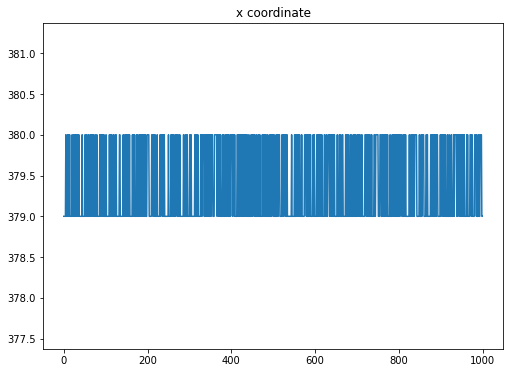

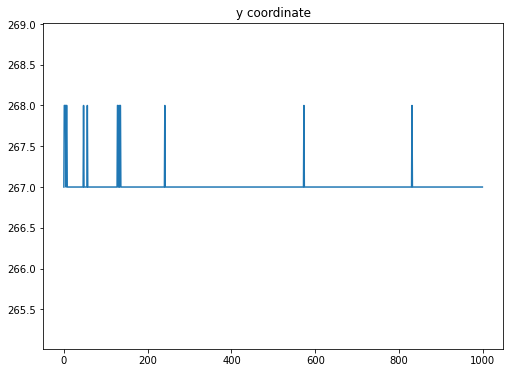

In [91]:
from tqdm import tqdm

NB_DATAPOINTS = 1000;
try:
    cam = init_camera()
    # Get warp matrix and map dimensions
    M, rect_width, rect_height, map, map_enlarged = init_map(cam)

    #position (x,y) variance

    thymio.stop_thymio()

    thymio_x = []
    thymio_y = []

    for i in tqdm(range(NB_DATAPOINTS)):
        t0 = time.time()
        img, img_taken = take_picture(cam)
        img_rect = get_rectified_img(img, M, rect_width, rect_height)
        if img_taken:
            thymio_pose, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
            if thymio_found:
                thymio_x = np.append(thymio_x, thymio_pose[0])
                thymio_y = np.append(thymio_y, thymio_pose[1])
                dt = time.time() - t0
                if dt < T_s:
                    time.sleep(T_s-dt)

    mean_x = np.mean(thymio_x)
    mean_y = np.mean(thymio_y)
    
    thymio.stop_thymio()
    plt.figure()
    plt.plot(thymio_x)
    plt.title("x coordinate")
    plt.gca().set_ylim(mean_x - 2, mean_x + 2)
    
    plt.figure()
    plt.plot(thymio_y)
    plt.title("y coordinate")
    plt.gca().set_ylim(mean_y - 2, mean_y + 2)
    cov_xy_R = np.cov(thymio_x,thymio_y)
    
    print('cov_xy_R = {}'.format(cov_xy_R))
finally:
    cam.release()


### 7.2.2 Velocity covariance measurement
In our project, the x and y velocities are calculated using the measured angle from the camera (or updated/estimated at each rotation) and the speed from the Thymio's encoders: 
$v_x = \frac{v_l+v_r}{2}\cdot \cos{\alpha}$ and
$v_y = -\frac{v_l+v_r}{2}\cdot \sin{\alpha}$.

To measure the maximum covariance for each velocity, we have to maximize their cos or sin terms. In the case of the x-velocity, we choose $\alpha = 0$ (move along x-axis) and for the y-velocity, we choose $\alpha = \pi/2 $ (move along y-axis). We can then plot the measured velocities and calculate the covariance matrix.


Measuring y-velocity...: 100%|███████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.86it/s]


x-velocity variance: 	 0.3087671949583931 px^2/s^2
y-velocity variance: 	 0.3019591519678992 px^2/s^2


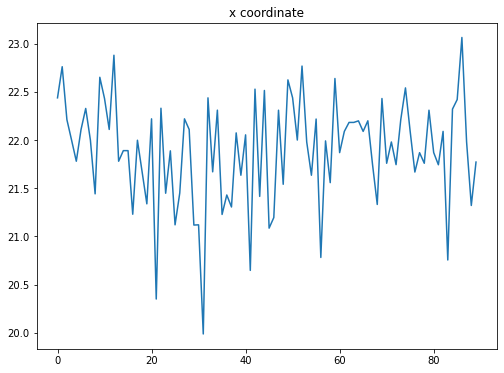

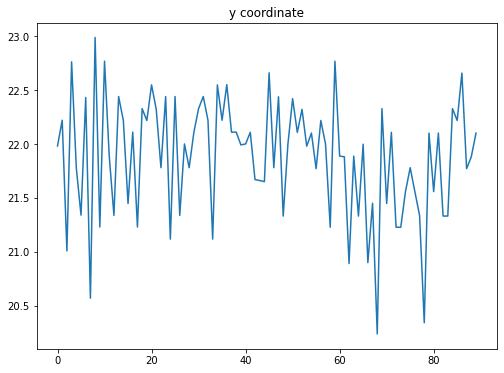

In [104]:
from tqdm import tqdm
SPEED_COEFF = 0.22
NB_DATAPOINTS = 100;
try:
    cam = init_camera()
    # Get warp matrix and map dimensions
    M, rect_width, rect_height, map, map_enlarged = init_map(cam)

    #position (x,y) variance

    thymio.set_motor_speeds(BASE_SPEED, BASE_SPEED)

    thymio_vx = []

    for i in tqdm(range(NB_DATAPOINTS), desc = "Measuring x-velocity..."):
        t0 = time.time()
        img, img_taken = take_picture(cam)
        img_rect = get_rectified_img(img, M, rect_width, rect_height)
        if img_taken:
            thymio_pose, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
            if thymio_found:
                vx = (thymio.get_motor_left_speed() + thymio.get_motor_right_speed())/2 * SPEED_COEFF * math.cos(thymio_pose[2])
                thymio_vx.append(vx)
                dt = time.time() - t0
                if dt < T_s:
                    time.sleep(T_s-dt)

    thymio.rotate_thymio(math.pi/2)
    thymio.set_motor_speeds(BASE_SPEED, BASE_SPEED)
    
    thymio_vy = []
    
    for i in tqdm(range(NB_DATAPOINTS), desc = "Measuring y-velocity..."):
        t0 = time.time()
        img, img_taken = take_picture(cam)
        img_rect = get_rectified_img(img, M, rect_width, rect_height)
        if img_taken:
            thymio_pose, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
            if thymio_found:
                vy = -(thymio.get_motor_left_speed() + thymio.get_motor_right_speed())/2 * SPEED_COEFF * math.sin(thymio_pose[2])
                thymio_vy.append(vy)
                dt = time.time() - t0
                if dt < T_s:
                    time.sleep(T_s-dt)
                    
    thymio.stop_thymio()
    
    thymio_vx = np.delete(thymio_vx, np.arange(10), 0) # remove first 10 datapoints which are not relevant
    thymio_vy = np.delete(thymio_vy, np.arange(10), 0)
    
    plt.figure()
    plt.plot(thymio_vx)
    plt.title("x coordinate")
    
    plt.figure()
    plt.plot(thymio_vy)
    plt.title("y coordinate")
    
    var_vx = np.var(thymio_vx)
    var_vy = np.var(thymio_vy)
    
    print("x-velocity variance: \t {} px^2/s^2".format(var_vx))
    print("y-velocity variance: \t {} px^2/s^2".format(var_vy))
finally:
    cam.release()


## 7.3 Process noise covariance matrix
After trying to estimate the Thymio's position and speed solely based on the model (prediction), we have found that the prediction slightly diverges from the Thymio's actual position. This is done by covering the marker on the Thymio, in which case we set the measurement covariance matrix R to infinity, to only base our results on the prediction. Hence, we want to give more weight to the measurements, and we have found that a good value for the process noise covariance matrix was as follows: 

$ Q = \begin{bmatrix}
    2 & 0 & 0 & 0\\
    0 & 2 & 0 & 0\\
    0 & 0 & 3 & 0\\
    0 & 0 & 0 & 3\\
\end{bmatrix}$
Note that, in making the matrix diagonal, we are making the simplification of assuming that the position and velocity noise is uncorrelated; in this reality, this is probably not the case. 

# 8 Local avoidance

When transitioning from the global navigation to the local navigation state, the algorithm chooses a node on the global path, behind the local obstacle, which is far enough so as not to collide with it.
Once in the local avoidance state, the chosen node serves as an attractive potential field, whereas physical obstacles and map obstacles act as repulsive fields. Physical obstacles are easily modeled using the proximity sensors of the Thymio and by them giving different weights.

For the map obstacles (in black) however, as they are flat on the ground, we need to rely on map information and Thymio position to compute their respective field. To do so, we create a virtual zone around the Thymio in which we check for map obstacles. We then give weights to these obstacles according to their angle relative to the Thymio. For example, an obstacle which is to the left of the Thymio in its frame of reference would push the Thymio to the right.

The drawback of this method is that in our current implementation, local navigation relies on camera measurements to be able to detect the Thymio's position relative to its local objective. A way to work around this issue might be to implement the Kalman filter during local avoidance. 

When the camera is obstructed, the Thymio is ordered to stop its motors to prevent it from straying too far from its original path.

In [22]:
from local_navigation import *

For this demonstration, you will need to print a map and place the ArUco markers in the correct places (4 markers for the map corners, 1 for the Thymio and 1 for the objective). In the following demonstration, the Thymio tries to get to the objective using a potential field. The objective is an attractive node, and physical obstacles or map obstacles that are in its path are repulsive.

In [37]:
thymio = MyThymio(verbose = True) # comment if there is already a thymio instance
cam = init_camera()
M, rect_width, rect_height, map, map_enlarged = init_map(cam)
obj_pos = [0, 0]
obj_found = False
while not obj_found:
   img, img_taken = take_picture(cam)
   if img_taken:
       img_rect = get_rectified_img(img, M, rect_width, rect_height)
       obj_pos, obj_found = locate_goal_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
local_avoidance(thymio, obj_pos, cam, M, rect_width, rect_height, map_enlarged)
cam.release()

Connecting to Thymio. Try 1/inf...
Connecting to Thymio. Try 2/inf...
Connecting to Thymio. Try 3/inf...
Successfully connected to thymio on COM14.
Obstacle avoided


## 8.1 Local avoidance demonstration
<video controls src="./video/local_avoidance.mp4" />

# 9 Navigation
To follow the global path, we use the following mechanism:
1. Calculate angle necessary to rotate to face next node on global path
2. If the angle is large enough, stop the Thyimo and rotate towards that node.
3. Move in direction of that node in a straight line, until we are close enough.
4. Repeat from step 1.

Using only this mechanism, there is a chance that the Thymio could diverge from the global path; for example, if it is slightly moved by accident, and then doesn't get close enough to the following node. To solve this problem, we implemented a potential field mechanism, where the following node to reach is attractive. This produces very robust path following and makes it so that the Thymio is able to reach the following node even if it is physically moved away from it. 

The following demonstrations are obtained by running the **main.py** Python script.

In [11]:
exec(open("src\main.py").read())

Connecting to Thymio. Try 1/inf...
Connecting to Thymio. Try 2/inf...
Connecting to Thymio. Try 3/inf...
Connecting to Thymio. Try 4/inf...
Successfully connected to thymio on COM14.
Initializing camera
Initializing map
Thymio found.
Objective found
Computing global path
Obstacle avoided
Obstacle avoided
Global objective reached


## 9.1 Full demo
<video controls src="./video/demo.mp4" />

## 9.2 More demonstrations
### 9.2.1 Global path following and kidnapping situations
<video controls src="./video/global_path_kidnapping.mp4" />

### 9.2.2 Transition between local and global navigation
<video controls src="./video/global_local.mp4" />

### 9.2.3 Obstructed camera
<video controls src="./video/obstructed_camera.mp4" />

# 10 Conclusion

In conclusion, we were successfully able to implement a global path planning algorithm (A*) on a grid map, and were also able to regulate the Thymio to follow that path. The local avoidance algorithm (potential field) also works very well, but has some drawbacks:
- The Thymio still needs measurement from the camera to localize itself during the local avoidance state. This could be further developed, for example by using a more complete model with the use of an extended Kalman filter.
- The potential field can lead to local minima, or can lead the robot to go out of the map if it tries to follow a wall that leads to the map's edges.
- The computational cost of our algorithm is quite high. This could be optimized by using a library such as numba, or using a faster language such as C. Another way would be to run a part of the program on the Thymio, which would allow us to not rely on the cable, which in our case was necessary to ensure fast data transmission.